In [1]:
#Importing the required libraries
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision.transforms import ToTensor, Compose, Normalize 
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
train_transform = transforms.ToTensor()
test_transform = transforms.ToTensor()

In [3]:
#Importing the datasets
train = datasets.FashionMNIST(root="data",train=True,download=True,transform=train_transform)
test = datasets.FashionMNIST(root="data",train=False,download=True,transform=test_transform)

In [4]:
train_dataloader = DataLoader(train,batch_size=10,shuffle=True)
test_dataloader = DataLoader(test,batch_size=10,shuffle=False)

In [5]:
print(f"Training_image_available:{len(train)}")
print(f"Test_Image_available:{len(test)}")

Training_image_available:60000
Test_Image_available:10000


In [6]:
train[7]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000,
           0.0000, 0.0000, 0.0000, 0.2471, 0.1098, 0.0000, 0.0000, 0.0000,
           0.1294, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000,
           0.1098, 0.4941, 0.9451, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
           1.0000, 0.9882, 0.9725, 0.4353, 0.0000, 0.0000, 0.0000, 0.0078,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000, 0.8078,
           0.9569, 0.9843, 0.9451, 0.9020, 0.9333, 0.8667, 0.8039, 0.9020,
           0.9412, 0.9020, 0.9373, 0.9843, 0.9137, 0.6471, 0.0000, 0.0000,
           0.0078, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.7804, 0.9843,
           0.8941, 0.9176, 0.9137, 0.9255, 0.9216, 0.9608, 0.9686, 0.9294,
           0.9176, 0.9373, 0.9020, 0.9020, 

In [7]:
image,label = train[5]
print(f"shape:{image.shape} \nlabel:{label}")

shape:torch.Size([1, 28, 28]) 
label:2


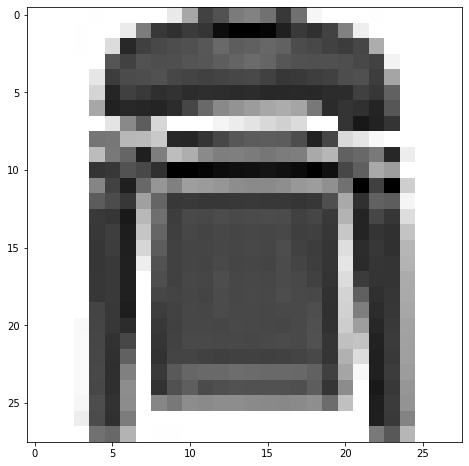

In [8]:
#Displaying the image of one of the labels in the dataset
plt.figure(figsize=(10,8))
plt.imshow(train[5][0].reshape((28,28)),cmap="gist_yarg");

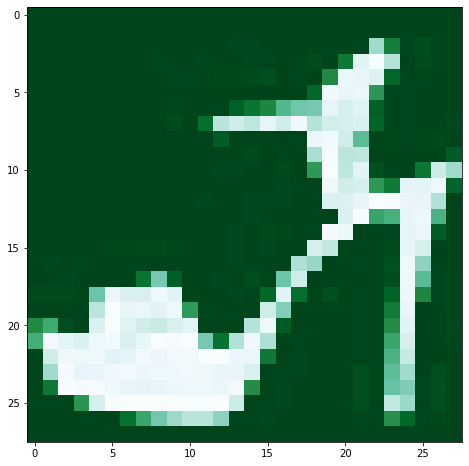

In [9]:
plt.figure(figsize=(10,8))
plt.imshow(train[9][0].reshape(28,28),cmap="BuGn_r");

In [10]:
#Building the neural network model
class neuralnetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.relu_stack = nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,412),
        nn.ReLU(),
        nn.Linear(412,100),
        nn.ReLU(),
        nn.Linear(100,10)
)
  def forward(self,x):
    x =self.flatten(x)
    logits = self.relu_stack(x)
    return logits
    


In [11]:
model = neuralnetwork()

In [12]:
#The model contains four linear layers with a ReLU-unit as an activation function
model

neuralnetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=412, bias=True)
    (3): ReLU()
    (4): Linear(in_features=412, out_features=100, bias=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

In [14]:
#Training and testing the model for the given data-sets for ten epochs.
import time
start_time = time.time()
train_losses=[]
train_correct = []
test_losses=[]
test_correct= []

epochs = 10  

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0
  for b,(X_train,y_train) in enumerate(train_dataloader):
    b+=1
    y_preds = model(X_train)
    losses = criterion(y_preds,y_train)
    predicted = torch.max(y_preds.data,1)[1]
    batch_corr = (predicted==y_train).sum()
    trn_corr += batch_corr 

    optimizer.zero_grad()
    losses.backward()
    optimizer.step()

    #Print interim results
    if b%600==0:
      print(f"epoch:{i:2}, batch:{b:4} [{10*b:6}/60000], loss:{losses.item():10.8f}, accuracy: {trn_corr.item()*100/(10*b):7.3f}%")
  train_losses.append(losses)
  train_correct.append(trn_corr)

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      b+=1
      y_val = model(X_test)
      loss_test = criterion(y_val,y_test)
      predicted = torch.max(y_val.data,1)[1]
      batch_corr_1 = (predicted==y_test).sum()
      tst_corr+= batch_corr_1
  
  test_losses.append(loss_test)
  test_correct.append(tst_corr) 

epoch: 0, batch: 600 [  6000/60000], loss:2.31972575, accuracy:  10.800%
epoch: 0, batch:1200 [ 12000/60000], loss:2.27809525, accuracy:  11.117%
epoch: 0, batch:1800 [ 18000/60000], loss:2.21080732, accuracy:  12.156%
epoch: 0, batch:2400 [ 24000/60000], loss:2.16994953, accuracy:  15.079%
epoch: 0, batch:3000 [ 30000/60000], loss:2.07875347, accuracy:  17.507%
epoch: 0, batch:3600 [ 36000/60000], loss:2.11568069, accuracy:  19.167%
epoch: 0, batch:4200 [ 42000/60000], loss:1.77778602, accuracy:  21.314%
epoch: 0, batch:4800 [ 48000/60000], loss:1.65582812, accuracy:  23.904%
epoch: 0, batch:5400 [ 54000/60000], loss:1.59798491, accuracy:  26.994%
epoch: 0, batch:6000 [ 60000/60000], loss:1.44393563, accuracy:  29.638%
epoch: 1, batch: 600 [  6000/60000], loss:1.55434537, accuracy:  54.983%
epoch: 1, batch:1200 [ 12000/60000], loss:1.22167277, accuracy:  57.258%
epoch: 1, batch:1800 [ 18000/60000], loss:0.96960890, accuracy:  59.022%
epoch: 1, batch:2400 [ 24000/60000], loss:1.3289305

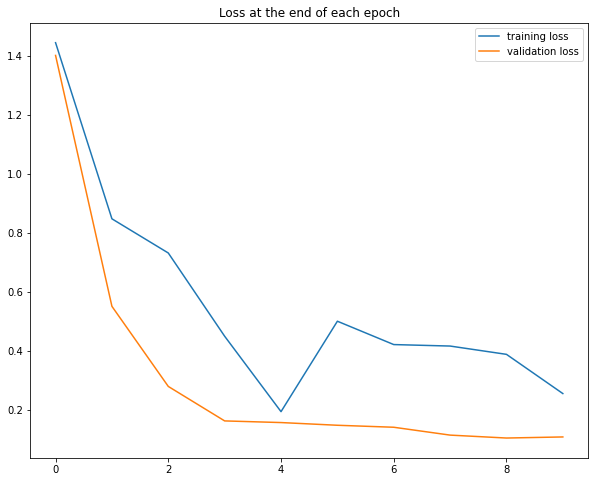

In [15]:
#Plotting the training and test losses.
plt.figure(figsize=(10,8))
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

In [27]:
#Evaluating the model on a random sample from the given data-set.
classes = [
            "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
model.eval()
x,y = test[5][0],test[5][1]
with torch.no_grad():
  pred_1 = model(x)
  predicted,actual = classes[pred_1[0].argmax(0)], classes[y]
  print(f"Predicted: {predicted}, Actual: {actual}")

Predicted: Trouser, Actual: Trouser
